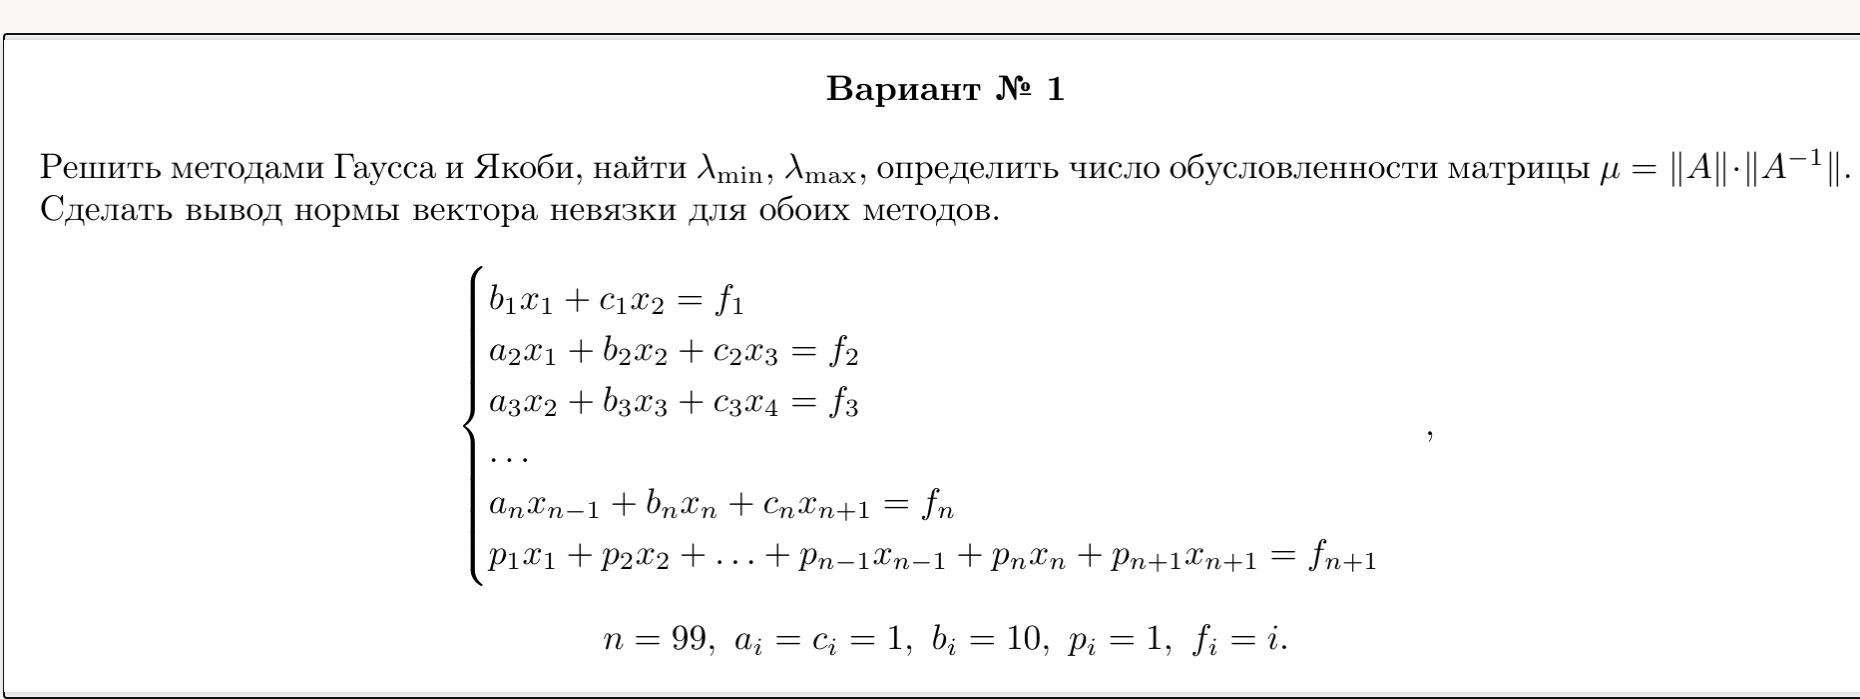

In [2]:
import numpy as np
n = 100
A = np.zeros((n-1,n),dtype=np.float)
for i in range(1,n-1):
    A[i][i-1] = 1
    A[i][i] = 10
    A[i][i+1] = 1
A[0][0] = 10
A[0][1] = 1
A = np.vstack((A,np.ones(100)))
print(A.shape)
f = np.zeros((n,1))
for i in range(n):
    f[i][0] = i+1
A

(100, 100)


array([[10.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., 10.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., 10., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., 10.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [3]:
def DivideRow(A, B, row, divider):
    if divider != 0:
        A[row,] /= divider
        B[row,0] /= divider
        #A[row] = [a / divider for a in A[row]]
        
def SwapRows(A, B, row1, row2):
    A[[row1,row2]] = A[[row2,row1]]
    
def CombineRows(A, B, row, destination_row, weight):
    for i in range(n):
        A[destination_row,i] += weight*A[row,i]
        B[destination_row,0] += weight*B[row,0]
#    A[row] = np.array([(a + k * weight) for a, k in zip(A[row], A[source_row])])
#    B[row] += B[source_row] * weight

In [4]:
#DivideRow(A, f, 0, 10)
SwapRows(A,f,0,1)
CombineRows(A,f,0,1,-1)
f

array([[  1.],
       [-98.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 18.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 23.],
       [ 24.],
       [ 25.],
       [ 26.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 37.],
       [ 38.],
       [ 39.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.],
       [ 48.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 64.],
       [ 65.],
       [ 66.],
       [ 6

In [ ]:
myA = list(A)
def FancyPrint(A, B, selected):
    for row in range(len(B)):
        print("(", end='')
        for col in range(len(A[row])):
             print("\t{1:10.2f}{0}".format(" " if (selected is None
or selected != (row, col)) else "*", A[row][col]), end='')
        print("\t) * (\tX{0}) = (\t{1:10.2f})".format(row + 1, B[row]))
# --- end of вывод системы на экран

# --- перемена местами двух строк системы
def SwapRows(A, B, row1, row2):
    A[row1], A[row2] = A[row2], A[row1]
    B[row1], B[row2] = B[row2], B[row1]
# --- end of перемена местами двух строк системы

# --- деление строки системы на число
def DivideRow(A, B, row, divider):
    A[row] = [a / divider for a in A[row]]
    B[row] /= divider
# --- end of деление строки системы на число

# --- сложение строки системы с другой строкой, умноженной на число
def CombineRows(A, B, row, source_row, weight):
    A[row] = [(a + k * weight) for a, k in zip(A[row], A[source_row])]
    B[row] += B[source_row] * weight
# --- end of сложение строки системы с другой строкой, умноженной начисло

# --- решение системы методом Гаусса (приведением к треугольному виду)
def Gauss(A, B):
    column = 0
    while (column < len(B)):
        print("Ищем максимальный по модулю элемент в {0}-м столбце:".format(column + 1))
        current_row = None
        for r in range(column, len(A)):
            if current_row is None or abs(A[r][column]) > abs(A[current_row][column]):
                 current_row = r
        if current_row is None:
            print("решений нет")
            return None
        #FancyPrint(A, B, (current_row, column))
        if current_row != column:
            print("Переставляем строку с найденным элементом повыше:")
            SwapRows(A, B, current_row, column)
            #FancyPrint(A, B, (column, column))
        print("Нормализуем строку с найденным элементом:")
        DivideRow(A, B, column, A[column][column])
        #FancyPrint(A, B, (column, column))
        print("Обрабатываем нижележащие строки:")
        for r in range(column + 1, len(A)):
            CombineRows(A, B, r, column, -A[r][column])
        #FancyPrint(A, B, (column, column))
        column += 1
    print("Матрица приведена к треугольному виду, считаем решение")
    X = [0 for b in B]
    for i in range(len(B) - 1, -1, -1):
        X[i] = B[i] - sum(x * a for x, a in zip(X[(i + 1):], A[i][(i + 1):]))
    print("Получили ответ:")
    print("\n".join("X{0} =\t{1:10.2f}".format(i + 1, x) for i, x in
enumerate(X)))
    return X
# --- end of решение системы методом Гаусса (приведением к треугольному виду)
print("Исходная система:")
FancyPrint(myA, myB, None)
print("Решаем:")
Gauss(myA, myB)

In [21]:
import numpy as np

A = np.ones((3,3))
A[:] +=1
#for i in range(10):
A[0,] += 1
A

array([[3., 3., 3.],
       [2., 2., 2.],
       [2., 2., 2.]])